##### O presente case tem como objetivo analisar dados históricos de reservas de um hotel e estruturar um conjunto de hipóteses e iniciativas capazes de orientar estratégias para elevar a receita anual em 20%. A partir da base de dados disponibilizada, busca-se compreender o comportamento da demanda, identificar padrões relevantes e reconhecer oportunidades de melhoria no desempenho financeiro.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

In [5]:
df_hotel = pd.read_excel('Case Hotel BA.xlsx', sheet_name='Base de Dados')
df_hotel

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Offline,0,D,Sem pgto,15.0,105.50,0,Cancelada,2015-04-22
1,1,85,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Online,0,A,Sem pgto,240.0,82.00,1,Cancelada,2015-05-06
2,1,60,2015-07-01,2015,7,1,2,5,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,107.00,2,Cancelada,2015-05-11
3,1,96,2015-07-01,2015,7,1,2,8,2,0,...,PRT,Direta,0,E,Sem pgto,NaN,108.30,2,Cancelada,2015-05-29
4,1,23,2015-07-01,2015,7,1,0,4,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,123.00,0,Cancelada,2015-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,...,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,...,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14


In [6]:
df_hotel.describe()

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,cliente_recorrente,agencia_turismo,receita_por_noite,pedidos_especiais,data_status_reserva
count,39859.000000,39859.000000,39859,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,31801.000000,39859.000000,39859.000000,39859
mean,0.278206,93.042098,2016-08-15 12:23:06.206377472,2016.121252,6.542613,15.814195,1.193382,3.136105,1.868562,0.129005,0.013874,0.044156,217.709192,95.413312,0.619007,2016-07-28 08:31:59.807320832
min,0.000000,0.000000,2015-07-01 00:00:00,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,2014-11-18 00:00:00
25%,0.000000,10.000000,2016-02-14 00:00:00,2016.000000,4.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,240.000000,50.400000,0.000000,2016-01-26 00:00:00
50%,0.000000,58.000000,2016-08-19 00:00:00,2016.000000,7.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,240.000000,75.650000,0.000000,2016-07-31 00:00:00
75%,1.000000,155.000000,2017-03-05 00:00:00,2017.000000,9.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,242.000000,125.500000,1.000000,2017-02-11 00:00:00
max,1.000000,737.000000,2017-08-31 00:00:00,2017.000000,12.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,535.000000,508.000000,5.000000,2017-09-14 00:00:00
std,0.448121,97.365069,NaN,0.722550,3.179149,8.884775,1.147829,2.461957,0.697594,0.445839,0.118884,0.205443,88.115646,61.245616,0.813391,NaN


In [7]:
# corrigindo a coluna mes_chegada e data_chegada da base original
df_hotel['mes_chegada'] = pd.to_numeric(df_hotel['mes_chegada'], errors='coerce')
df_hotel['mes_chegada'] = df_hotel['mes_chegada'].ffill().astype(int)
df_hotel['data_chegada'] = pd.to_datetime(df_hotel[['ano_chegada', 'mes_chegada', 'diadomes_chegada']].rename(columns={'ano_chegada': 'year', 'mes_chegada': 'month', 'diadomes_chegada': 'day'}))
df_hotel

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Offline,0,D,Sem pgto,15.0,105.50,0,Cancelada,2015-04-22
1,1,85,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Online,0,A,Sem pgto,240.0,82.00,1,Cancelada,2015-05-06
2,1,60,2015-07-01,2015,7,1,2,5,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,107.00,2,Cancelada,2015-05-11
3,1,96,2015-07-01,2015,7,1,2,8,2,0,...,PRT,Direta,0,E,Sem pgto,NaN,108.30,2,Cancelada,2015-05-29
4,1,23,2015-07-01,2015,7,1,0,4,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,123.00,0,Cancelada,2015-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,...,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,...,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14


# Diagnóstico 1: Volume de Ocupação

In [3]:
print("A taxa de cancelamento é de {:.2f}%".format((df_hotel['reserva_cancelada'].sum() / len(df_hotel)) * 100))
pd.crosstab(df_hotel['reserva_cancelada'], df_hotel['status_reserva'])

NameError: name 'df_hotel' is not defined

In [ ]:
df_cancelado = df_hotel[df_hotel['reserva_cancelada'] == 1]
distribuicao_cancelamento = df_cancelado['status_reserva'].value_counts(normalize=True) * 100

print("Distribuição dos tipos de cancelamento (como % do total de cancelamentos):")
print(distribuicao_cancelamento)

Distribuição dos tipos de cancelamento (como % do total de cancelamentos):
status_reserva
Cancelada    97.41185
Ausente       2.58815
Name: proportion, dtype: float64


In [ ]:
cancelamento_por_pgto = pd.crosstab(df_cancelado['tipo_pgto'], df_cancelado['status_reserva'], normalize='index') * 100
print("Porcentagem de 'Ausente' e 'Cancelada' por tipo de pagamento (como % dos cancelamentos para esse tipo):")
print(cancelamento_por_pgto)

Porcentagem de 'Ausente' e 'Cancelada' por tipo de pagamento (como % dos cancelamentos para esse tipo):
status_reserva          Ausente  Cancelada
tipo_pgto                                 
Pgto não reembolsável  1.090909  98.909091
Pgto reembolsável      4.545455  95.454545
Sem pgto               2.845917  97.154083


In [ ]:
cancelamento_por_pgto = pd.crosstab(df_cancelado['tipo_pgto'], df_cancelado['status_reserva'])
print(cancelamento_por_pgto)

status_reserva         Ausente  Cancelada
tipo_pgto                                
Pgto não reembolsável       18       1632
Pgto reembolsável            1         21
Sem pgto                   268       9149


In [ ]:
porcentagem_cancelada_por_pgto = (cancelamento_por_pgto['Cancelada'] / cancelamento_por_pgto['Cancelada'].sum()) * 100
print("Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Cancelada'):")
print(porcentagem_cancelada_por_pgto)

Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Cancelada'):
tipo_pgto
Pgto não reembolsável    15.108313
Pgto reembolsável         0.194408
Sem pgto                 84.697278
Name: Cancelada, dtype: float64


In [ ]:
porcentagem_ausente_por_pgto = (cancelamento_por_pgto['Ausente'] / cancelamento_por_pgto['Ausente'].sum()) * 100
print("Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Ausente'):")
print(porcentagem_ausente_por_pgto)

Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Ausente'):
tipo_pgto
Pgto não reembolsável     6.271777
Pgto reembolsável         0.348432
Sem pgto                 93.379791
Name: Ausente, dtype: float64


In [ ]:
df_com_agencia = df_hotel[df_hotel['agencia_turismo'].notnull()]
df_sem_agencia = df_hotel[df_hotel['agencia_turismo'].isnull()]

taxa_cancelamento_com_agencia = (df_com_agencia['reserva_cancelada'].sum() / len(df_com_agencia)) * 100
taxa_cancelamento_sem_agencia = (df_sem_agencia['reserva_cancelada'].sum() / len(df_sem_agencia)) * 100

print("Taxa de cancelamento quando há uma agência de turismo: {:.1f}%".format(taxa_cancelamento_com_agencia))
print("Taxa de cancelamento quando não há agência de turismo: {:.1f}%".format(taxa_cancelamento_sem_agencia))
print("Quantidade de cancelamentos quando há uma agência de turismo:", df_com_agencia['reserva_cancelada'].sum() )
print("Quantidade de cancelamentos quando não há agência de turismo:", df_sem_agencia['reserva_cancelada'].sum() )

Taxa de cancelamento quando há uma agência de turismo: 30.5%
Taxa de cancelamento quando não há agência de turismo: 17.3%
Quantidade de cancelamentos quando há uma agência de turismo: 9695
Quantidade de cancelamentos quando não há agência de turismo: 1394


In [ ]:
agencia_stats = df_com_agencia.groupby('agencia_turismo').agg(
    quantidade_reservas=('reserva_cancelada', 'count'),
    quantidade_cancelamentos=('reserva_cancelada', 'sum')
)

print("Quantidade de reservas e cancelamentos por agência de turismo:")
agencia_stats.reset_index('agencia_turismo', inplace=True, drop = False)
agencia_stats = agencia_stats.sort_values(by='quantidade_cancelamentos', ascending=False)
agencia_stats['agencia_turismo'] = agencia_stats['agencia_turismo'].astype(int).astype(str).replace(np.nan, 'Sem Agência')
agencia_stats['taxa_cancelamento'] = (agencia_stats['quantidade_cancelamentos'] / agencia_stats['quantidade_reservas']) * 100
agencia_stats.sort_values(by='quantidade_cancelamentos', ascending=False, inplace=True)
agencia_stats

Quantidade de reservas e cancelamentos por agência de turismo:


,agencia_turismo,quantidade_reservas,quantidade_cancelamentos,taxa_cancelamento
73,240,13904,5483,39.434695
81,250,2869,513,17.880795
75,242,779,260,33.376123
33,96,535,244,45.607477
74,241,1721,236,13.712958
...,...,...,...,...
130,367,1,0,0.000000
143,418,8,0,0.000000
94,282,2,0,0.000000
57,167,1,0,0.000000


In [ ]:
cancelamentos_agencia_240 = agencia_stats[agencia_stats['agencia_turismo'] == '240']['quantidade_cancelamentos'].sum()
total_cancelamentos = agencia_stats['quantidade_cancelamentos'].sum()
porcentagem_agencia_240 = (cancelamentos_agencia_240 / total_cancelamentos) * 100

print(f"A porcentagem de cancelamentos da agência 240 sobre o total de cancelamentos é: {porcentagem_agencia_240:.1f}%")

A porcentagem de cancelamentos da agência 240 sobre o total de cancelamentos é: 56.6%


In [ ]:
agencias_alta_taxa = agencia_stats[agencia_stats['taxa_cancelamento'] > 20.0]
print(f"Quantidade de agências com taxa de cancelamento acima de 20%: {len(agencias_alta_taxa)}, cerca de {len(agencias_alta_taxa) / len(agencia_stats) * 100:.1f}% do total")

Quantidade de agências com taxa de cancelamento acima de 20%: 59, cerca de 32.4% do total


C:\Users\linde\AppData\Local\Temp\ipykernel_9044\201085371.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(


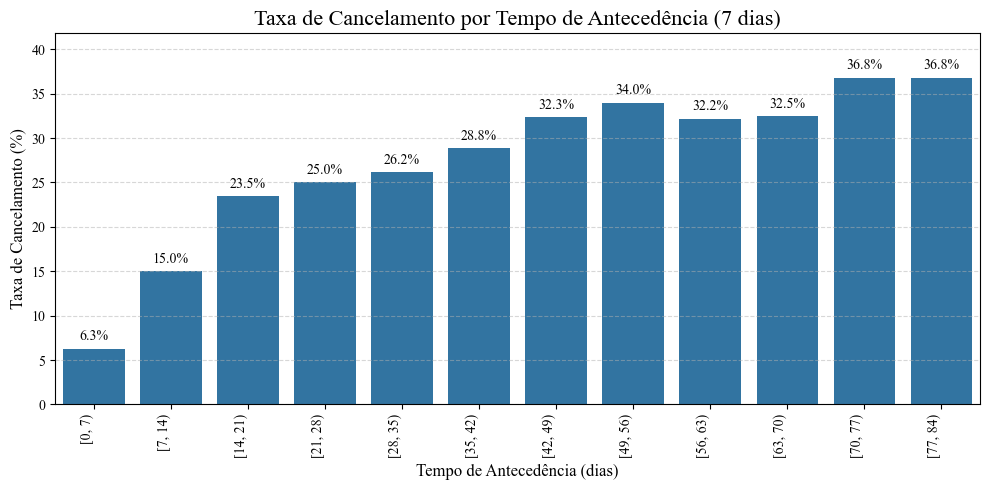

In [ ]:
bin_width = 7

bins = np.arange(0, bin_width*12+1, bin_width)
df_hotel['faixa_antecedencia'] = pd.cut(df_hotel['tempo_antecedencia'], bins=bins, right=False)

taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_antecedencia['taxa_cancelamento'] = (taxa_cancelamento_antecedencia['total_cancelamentos'] / taxa_cancelamento_antecedencia['total_reservas']) * 100
taxa_cancelamento_antecedencia.dropna(inplace=True)


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=taxa_cancelamento_antecedencia.index.astype(str), y='taxa_cancelamento', data=taxa_cancelamento_antecedencia)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.ylim(0, taxa_cancelamento_antecedencia['taxa_cancelamento'].max() + 5)
plt.title('Taxa de Cancelamento por Tempo de Antecedência (7 dias)', fontsize=16)
plt.xlabel('Tempo de Antecedência (dias)', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_9044\1642847165.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(


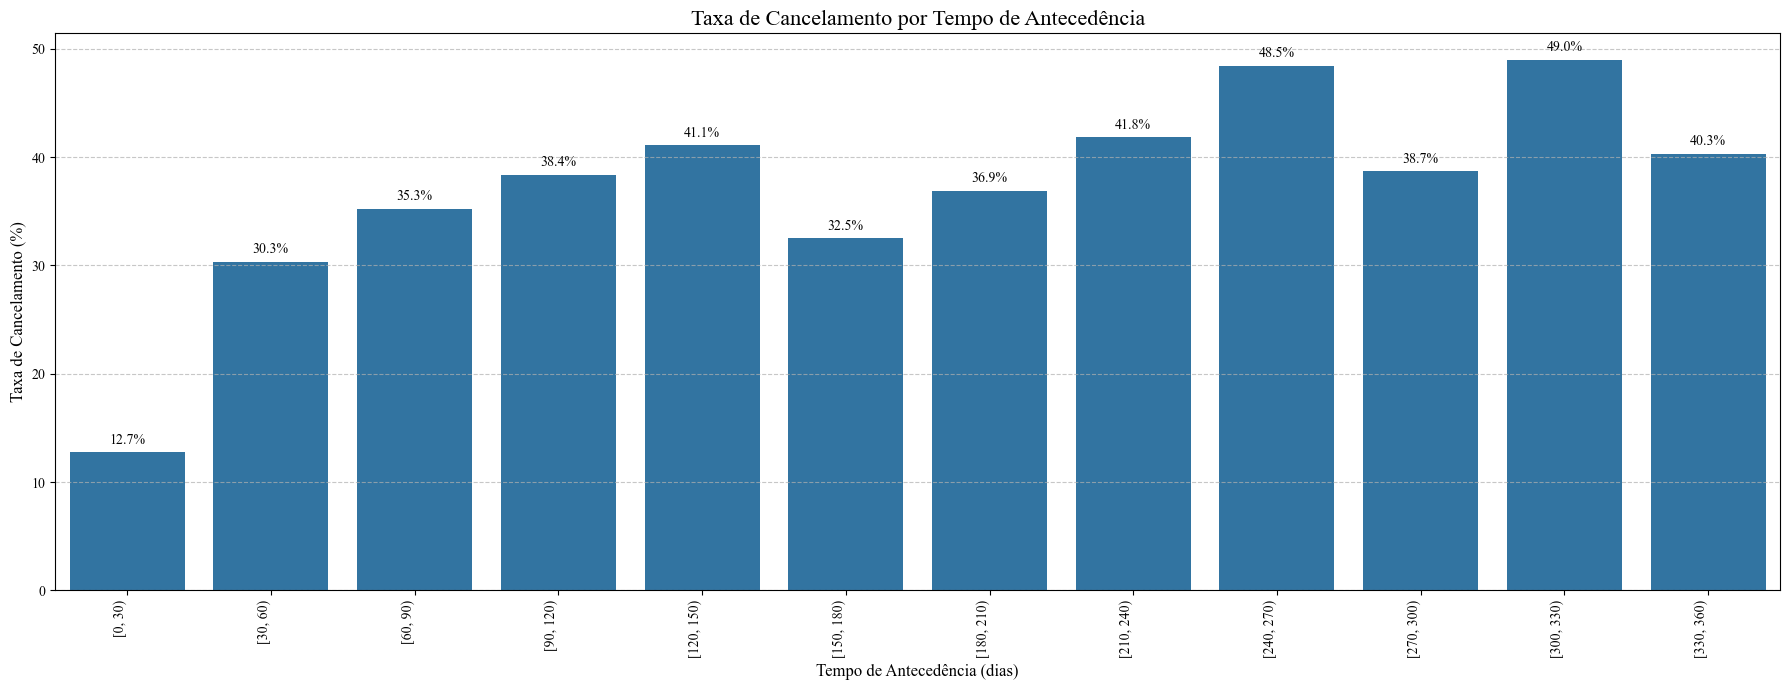

In [ ]:
bin_width = 30

bins = np.arange(0, bin_width*13, bin_width)
df_hotel['faixa_antecedencia'] = pd.cut(df_hotel['tempo_antecedencia'], bins=bins, right=False)

taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_antecedencia['taxa_cancelamento'] = (taxa_cancelamento_antecedencia['total_cancelamentos'] / taxa_cancelamento_antecedencia['total_reservas']) * 100
taxa_cancelamento_antecedencia.dropna(inplace=True)


plt.figure(figsize=(18, 7))
ax = sns.barplot(x=taxa_cancelamento_antecedencia.index.astype(str), y='taxa_cancelamento', data=taxa_cancelamento_antecedencia)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Tempo de Antecedência', fontsize=16)
plt.xlabel('Tempo de Antecedência (dias)', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_9044\1364251333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelado['total_noites'] = df_cancelado['nro_noites_fds'] + df_cancelado['nro_noites_dds']


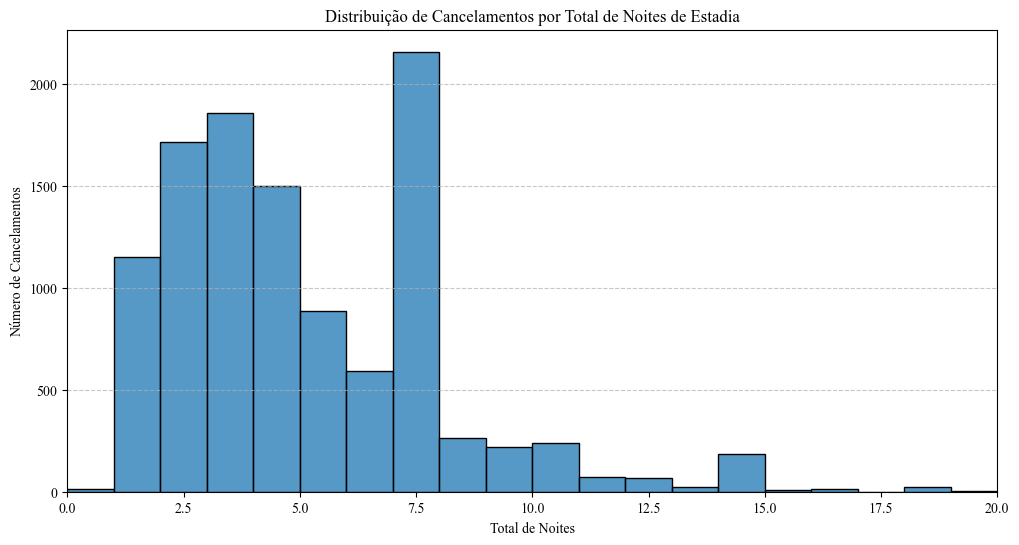

In [ ]:
df_cancelado['total_noites'] = df_cancelado['nro_noites_fds'] + df_cancelado['nro_noites_dds']

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cancelado, x='total_noites', binwidth=1, kde=False)
plt.title('Distribuição de Cancelamentos por Total de Noites de Estadia')
plt.xlabel('Total de Noites')
plt.ylabel('Número de Cancelamentos')
plt.xlim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

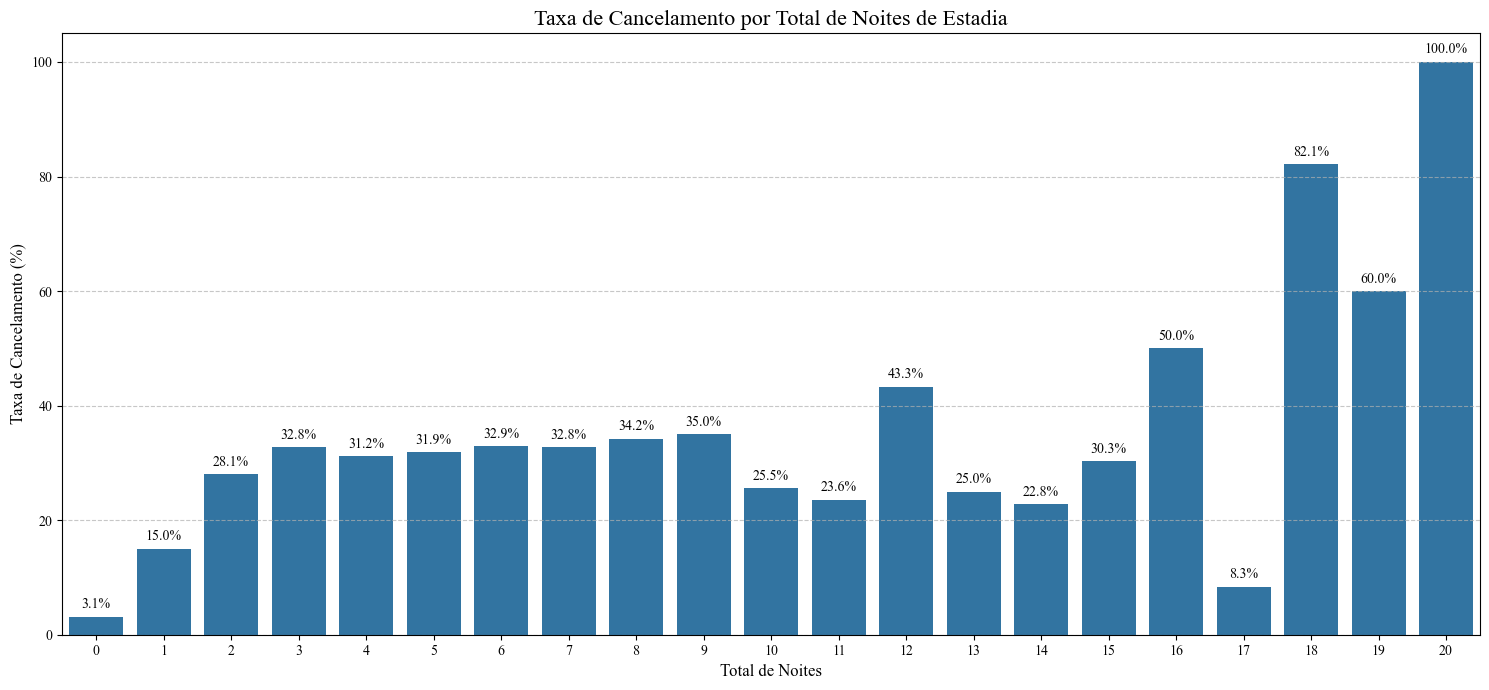

In [ ]:
df_hotel['total_noites'] = df_hotel['nro_noites_fds'] + df_hotel['nro_noites_dds']

taxa_cancelamento_noites = df_hotel.groupby('total_noites').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_noites['taxa_cancelamento'] = (taxa_cancelamento_noites['total_cancelamentos'] / taxa_cancelamento_noites['total_reservas']) * 100

taxa_cancelamento_noites_filtrado = taxa_cancelamento_noites[taxa_cancelamento_noites.index <= 20]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=taxa_cancelamento_noites_filtrado.index, y='taxa_cancelamento', data=taxa_cancelamento_noites_filtrado)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Total de Noites de Estadia', fontsize=16)
plt.xlabel('Total de Noites', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

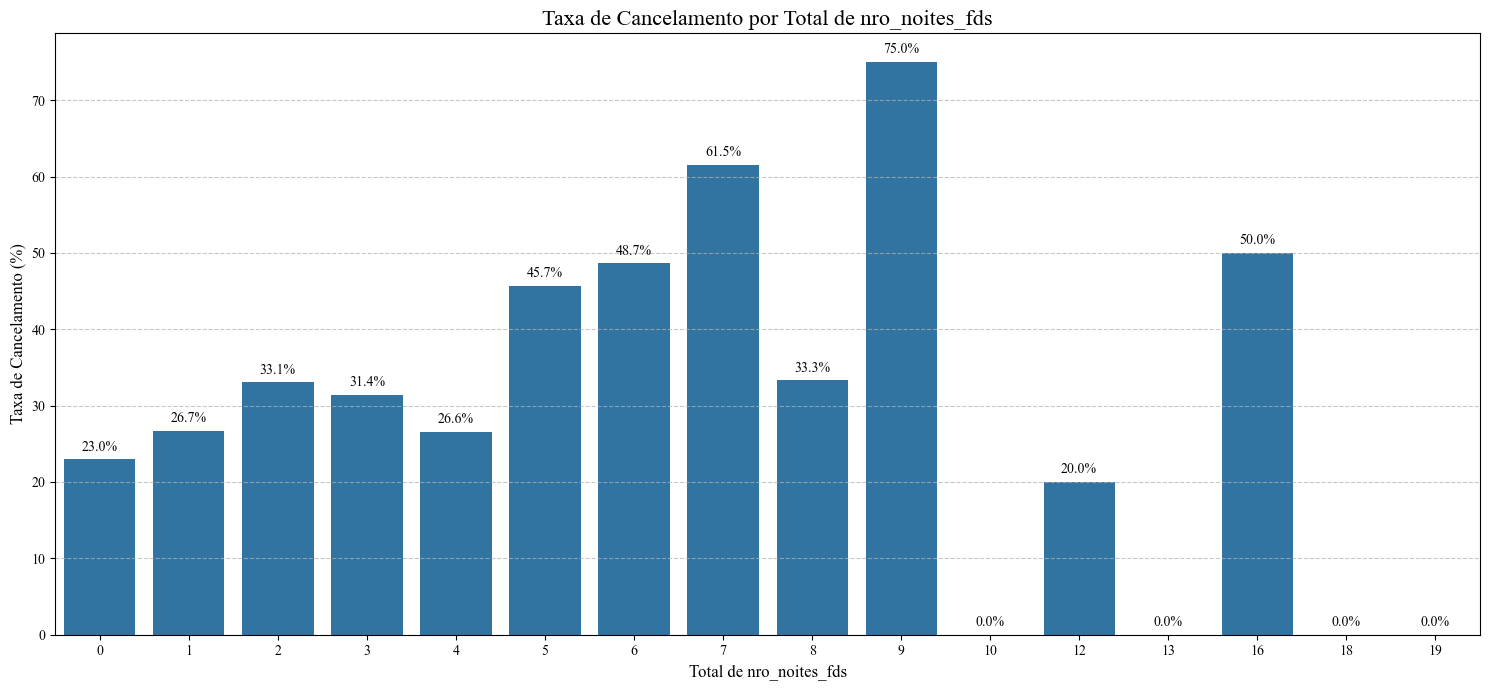

In [ ]:
taxa_cancelamento_fds = df_hotel.groupby('nro_noites_fds').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_fds['taxa_cancelamento'] = (taxa_cancelamento_fds['total_cancelamentos'] / taxa_cancelamento_fds['total_reservas']) * 100
# taxa_cancelamento_fds_filtrado = taxa_cancelamento_fds[taxa_cancelamento_fds.index <= 20]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=taxa_cancelamento_fds.index, y='taxa_cancelamento', data=taxa_cancelamento_fds)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Total de nro_noites_fds', fontsize=16)
plt.xlabel('Total de nro_noites_fds', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

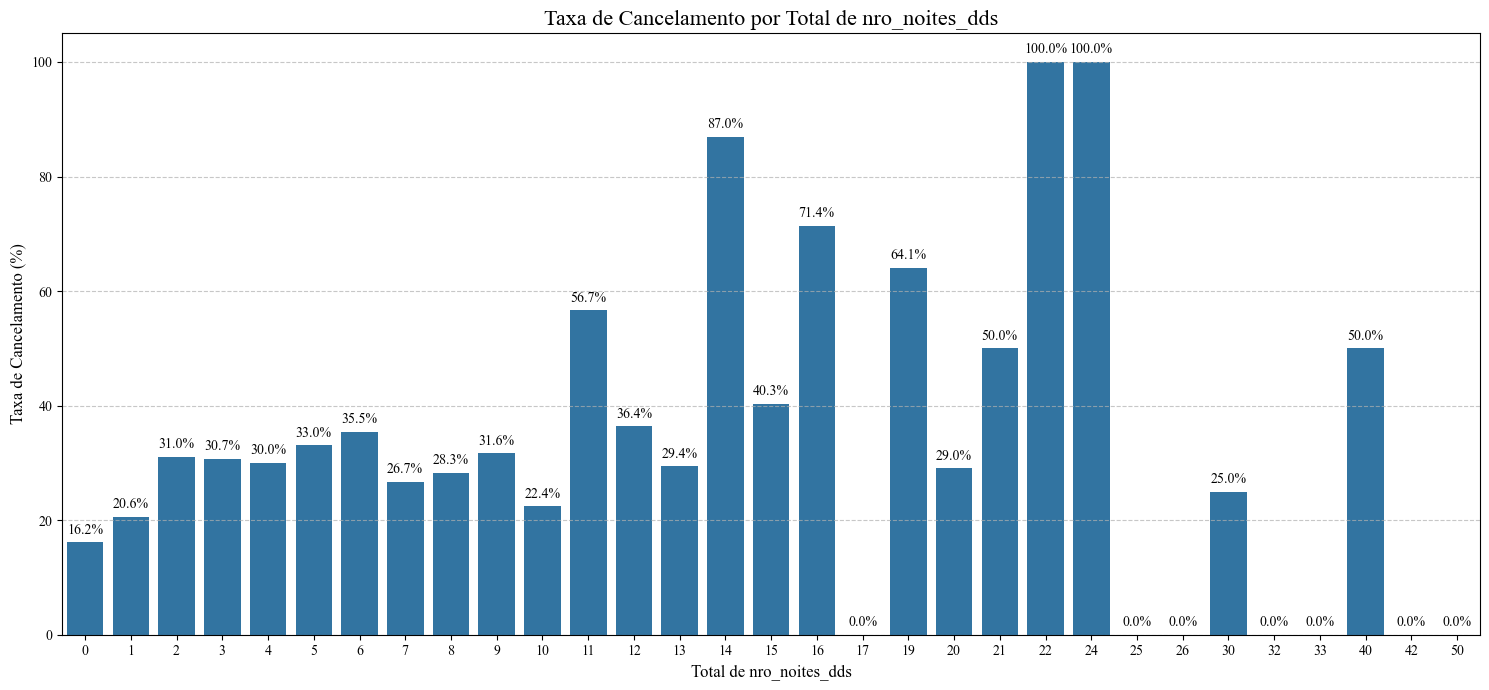

In [ ]:

taxa_cancelamento_dds = df_hotel.groupby('nro_noites_dds').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_dds['taxa_cancelamento'] = (taxa_cancelamento_dds['total_cancelamentos'] / taxa_cancelamento_dds['total_reservas']) * 100
# taxa_cancelamento_dds_filtrado = taxa_cancelamento_dds[taxa_cancelamento_dds.index <= 20]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=taxa_cancelamento_dds.index, y='taxa_cancelamento', data=taxa_cancelamento_dds)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Total de nro_noites_dds', fontsize=16)
plt.xlabel('Total de nro_noites_dds', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
estadias_longas = (df_hotel['total_noites'] > 14).sum()
total_estadias = len(df_hotel)
proporcao = (estadias_longas / total_estadias) * 100

print(f"A proporção de estadias com mais de 14 noites é: {proporcao:.1f}%")

A proporção de estadias com mais de 14 noites é: 0.7%


In [ ]:
taxa_cancelamento_segmento_recorrente = df_hotel.groupby(['segmento_mercado', 'cliente_recorrente']).agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_segmento_recorrente['taxa_cancelamento'] = (taxa_cancelamento_segmento_recorrente['total_cancelamentos'] / taxa_cancelamento_segmento_recorrente['total_reservas']) * 100

taxa_cancelamento_segmento_recorrente

total_reservas  total_cancelamentos  \
segmento_mercado cliente_recorrente                                        
AT Offline       0                             7312                 1120   
                 1                              160                   18   
AT Online        0                            17364                 6233   
                 1                              365                   15   
Corporativo      0                             1748                  327   
                 1                              561                   24   
Direta           0                             5908                  854   
                 1                              605                   24   
Grupos           0                             5767                 2444   
                 1                               69                   30   

                                     taxa_cancelamento  
segmento_mercado cliente_recorrente                     
AT Offline       0                           15.317287  
                 1                           11.250000  
AT Online        0                           35.896107  
                 1                            4.109589  
Corporativo      0                           18.707094  
                 1                            4.278075  
Direta           0                           14.454976  
                 1                            3.966942  
Grupos           0                           42.379053  
                 1                           43.478261

In [ ]:
taxa_cancelamento_segmento = df_hotel.groupby(['segmento_mercado']).agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_segmento['taxa_cancelamento'] = (taxa_cancelamento_segmento['total_cancelamentos'] / taxa_cancelamento_segmento['total_reservas']) * 100

taxa_cancelamento_segmento.reset_index('segmento_mercado', inplace=True, drop = False)
taxa_cancelamento_segmento

# AT Online (44,5%)
# Grupos (14,6%)

,segmento_mercado,total_reservas,total_cancelamentos,taxa_cancelamento
0,AT Offline,7472,1138,15.230193
1,AT Online,17729,6248,35.241694
2,Corporativo,2309,351,15.201386
3,Direta,6513,878,13.480731
4,Grupos,5836,2474,42.392049


In [ ]:
taxa_cancelamento_recorrente = df_hotel.groupby(['cliente_recorrente']).agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_recorrente['taxa_cancelamento'] = (taxa_cancelamento_recorrente['total_cancelamentos'] / taxa_cancelamento_recorrente['total_reservas']) * 100

taxa_cancelamento_recorrente.reset_index('cliente_recorrente', inplace=True, drop = False)
taxa_cancelamento_recorrente

,cliente_recorrente,total_reservas,total_cancelamentos,taxa_cancelamento
0,0,38099,10978,28.814405
1,1,1760,111,6.306818


In [ ]:
taxa_cancelamento_tipo_quarto = df_hotel.groupby('tipo_quarto').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_tipo_quarto['taxa_cancelamento'] = (taxa_cancelamento_tipo_quarto['total_cancelamentos'] / taxa_cancelamento_tipo_quarto['total_reservas']) * 100

taxa_cancelamento_tipo_quarto['total_reservas_pct'] = (taxa_cancelamento_tipo_quarto['total_reservas'] / taxa_cancelamento_tipo_quarto['total_reservas'].sum()) * 100

taxa_cancelamento_tipo_quarto.sort_values(by='total_reservas', ascending=False, inplace=True)
taxa_cancelamento_tipo_quarto.reset_index('tipo_quarto', inplace=True, drop = False)
taxa_cancelamento_tipo_quarto

,tipo_quarto,total_reservas,total_cancelamentos,taxa_cancelamento,total_reservas_pct
0,A,23279,6359,27.316465,58.403372
1,D,7416,1953,26.334951,18.605585
2,E,4960,1408,28.387097,12.443865
3,G,1602,642,40.074906,4.019168
4,F,1079,176,16.311399,2.707042
5,C,913,302,33.077766,2.290574
6,H,599,245,40.901503,1.502797
7,L,6,2,33.333333,0.015053
8,B,3,0,0.000000,0.007527
9,P,2,2,100.000000,0.005018


In [ ]:
df_reserva_ADE = taxa_cancelamento_tipo_quarto[(taxa_cancelamento_tipo_quarto['tipo_quarto'] == 'A') 
| (taxa_cancelamento_tipo_quarto['tipo_quarto'] == 'D')
| (taxa_cancelamento_tipo_quarto['tipo_quarto'] == 'E')]
df_reserva_ADE
print(f"A porcentagem de cancelamento média para os quartos tipo A, D e E: {df_reserva_ADE['total_cancelamentos'].sum()/df_reserva_ADE['total_reservas'].sum()*100:.1f}%")

A porcentagem de cancelamento média para os quartos tipo A, D e E: 27.3%


In [ ]:
reserva_ADE = df_reserva_ADE['total_reservas_pct'].sum()
print(f"A porcentagem de reservas dos tipos de quarto A, D e E é: {reserva_ADE:.1f}%")

A porcentagem de reservas dos tipos de quarto A, D e E é: 89.5%


In [ ]:
df_hotel['alimentacao_ajustado'] = df_hotel['alimentacao'].replace('Undefined', 'SC')
df_hotel['alimentacao_ajustado'].value_counts()

alimentacao_ajustado
BB    29840
HB     8027
SC     1243
FB      749
Name: count, dtype: int64

In [ ]:
taxa_cancelamento_alimentacao = df_hotel.groupby('alimentacao_ajustado').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_alimentacao['taxa_cancelamento'] = (taxa_cancelamento_alimentacao['total_cancelamentos'] / taxa_cancelamento_alimentacao['total_reservas']) * 100
taxa_cancelamento_alimentacao.reset_index('alimentacao_ajustado', inplace=True, drop = False)
taxa_cancelamento_alimentacao.sort_values(by='taxa_cancelamento', ascending=False, inplace=True)
taxa_cancelamento_alimentacao

,alimentacao_ajustado,total_reservas,total_cancelamentos,taxa_cancelamento
1,FB,749,443,59.145527
2,HB,8027,2543,31.680578
0,BB,29840,7817,26.196381
3,SC,1243,286,23.008850


In [ ]:
taxa_cancelamento_alimentacao = df_hotel.groupby('alimentacao').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_alimentacao['taxa_cancelamento'] = (taxa_cancelamento_alimentacao['total_cancelamentos'] / taxa_cancelamento_alimentacao['total_reservas']) * 100
taxa_cancelamento_alimentacao.reset_index('alimentacao', inplace=True, drop = False)
taxa_cancelamento_alimentacao.sort_values(by='taxa_cancelamento', ascending=False, inplace=True)
taxa_cancelamento_alimentacao

,alimentacao,total_reservas,total_cancelamentos,taxa_cancelamento
1,FB,749,443,59.145527
2,HB,8027,2543,31.680578
0,BB,29840,7817,26.196381
4,Undefined,1163,284,24.419604
3,SC,80,2,2.500000


In [ ]:
df_hotel['crianca_status'] = np.where(df_hotel['criancas'] > 0, 1, 0)
taxa_cancelamento_crianca = df_hotel.groupby('crianca_status').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_crianca['taxa_cancelamento'] = (taxa_cancelamento_crianca['total_cancelamentos'] / taxa_cancelamento_crianca['total_reservas']) * 100
taxa_cancelamento_crianca

,total_reservas,total_cancelamentos,taxa_cancelamento
crianca_status,,,
0,36386,9778,26.872973
1,3473,1311,37.748344


In [ ]:
df_hotel['bebe_status'] = np.where(df_hotel['bebes'] > 0, 1, 0)
taxa_cancelamento_bebe = df_hotel.groupby('bebe_status').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_bebe['taxa_cancelamento'] = (taxa_cancelamento_bebe['total_cancelamentos'] / taxa_cancelamento_bebe['total_reservas']) * 100
taxa_cancelamento_bebe

,total_reservas,total_cancelamentos,taxa_cancelamento
bebe_status,,,
0,39315,10986,27.943533
1,544,103,18.933824


In [ ]:
df_hotel['crianca_bebe_status'] = np.where((df_hotel['crianca_status'] == 1) | (df_hotel['bebe_status'] == 1), 1, 0)
taxa_cancelamento_crianca_bebe = df_hotel.groupby('crianca_bebe_status').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_crianca_bebe['taxa_cancelamento'] = (taxa_cancelamento_crianca_bebe['total_cancelamentos'] / taxa_cancelamento_crianca_bebe['total_reservas']) * 100
taxa_cancelamento_crianca_bebe.reset_index('crianca_bebe_status', inplace=True, drop = False)
taxa_cancelamento_crianca_bebe

,crianca_bebe_status,total_reservas,total_cancelamentos,taxa_cancelamento
0,0,35944,9695,26.972513
1,1,3915,1394,35.606641


# Diagnóstico 2: Receita Média

In [ ]:
taxa_cancelamento_pedidos = df_hotel.groupby('pedidos_especiais').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_pedidos['taxa_cancelamento'] = (taxa_cancelamento_pedidos['total_cancelamentos'] / taxa_cancelamento_pedidos['total_reservas']) * 100
taxa_cancelamento_pedidos.reset_index('pedidos_especiais', inplace=True, drop = False)
taxa_cancelamento_pedidos

,pedidos_especiais,total_reservas,total_cancelamentos,taxa_cancelamento
0,0,22260,7190,32.300090
1,1,11752,2593,22.064329
2,2,4790,1124,23.465553
3,3,901,166,18.423973
4,4,142,15,10.563380
5,5,14,1,7.142857


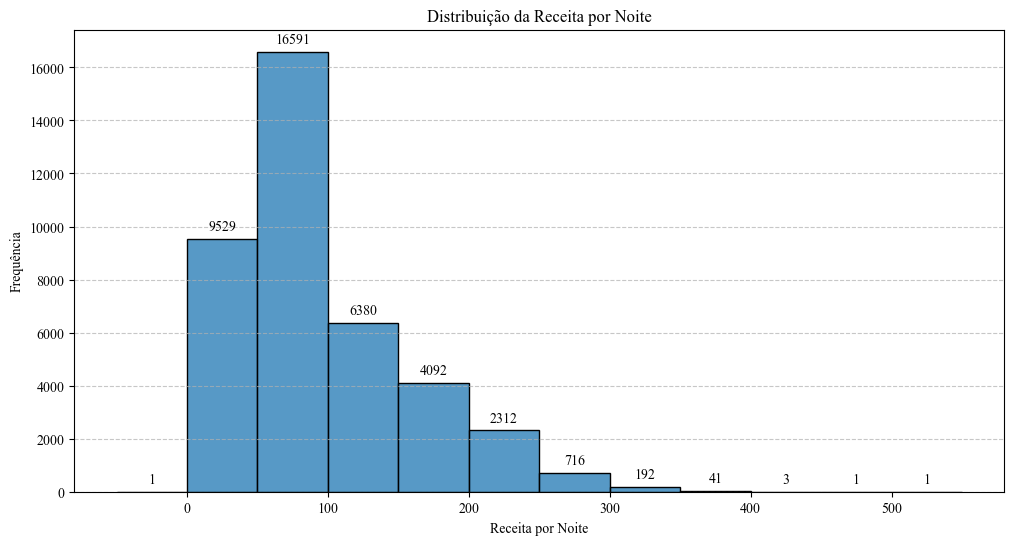

In [ ]:
bins = np.arange(-50, df_hotel['receita_por_noite'].max()+51, 50)

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_hotel, x='receita_por_noite', bins=bins, kde=False)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title('Distribuição da Receita por Noite')
plt.xlabel('Receita por Noite')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

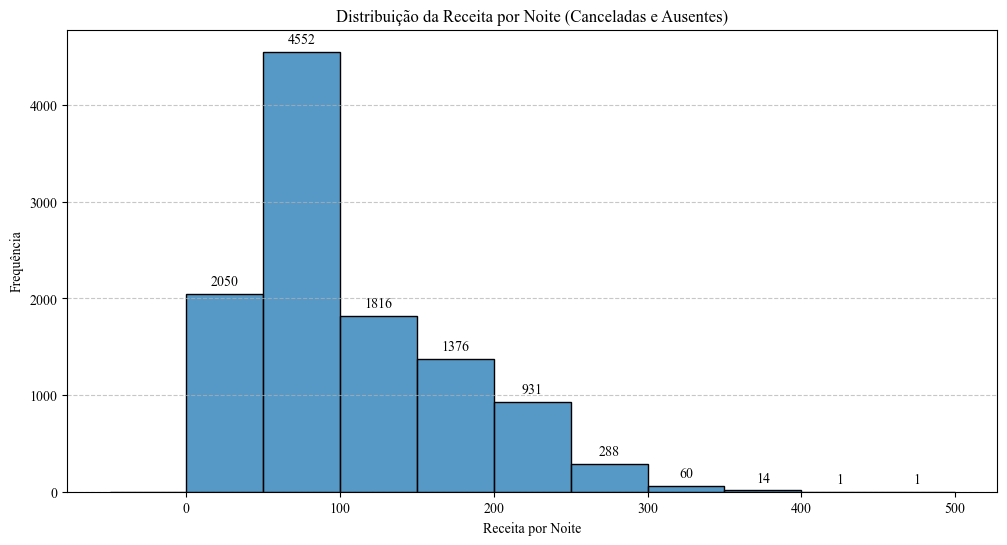

In [ ]:
bins = np.arange(-50, df_cancelado['receita_por_noite'].max()+51, 50)

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_cancelado, x='receita_por_noite', bins=bins, kde=False)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title('Distribuição da Receita por Noite (Canceladas e Ausentes)')
plt.xlabel('Receita por Noite')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df_hotel.groupby('status_reserva')['receita_por_noite'].mean()

status_reserva
Ausente        81.349129
Cancelada     106.756011
Confirmada     91.294876
Name: receita_por_noite, dtype: float64

Receita Média por Canal de Reserva:
   segmento_mercado  receita_por_noite
0           Direta         108.935308
1        AT Online         106.274003
2       AT Offline          73.847517
3           Grupos          67.779462
4      Corporativo          49.513064 

Receita Média por Tipo de Quarto:
   tipo_quarto  receita_por_noite
0           H         181.891977
1           G         160.701094
2           C         155.184714
3           L         151.000000
4           F         131.922757
5           E         109.631498
6           B         104.666667
7           D         100.316560
8           A          74.207342 

Receita Média por Regime de Refeições:
   alimentacao  receita_por_noite
0          FB         137.854869
1          HB         118.484050
2   Undefined          93.682628
3          BB          84.084320
4          SC           5.992949 

Receita Média por Cliente Recorrente:
    cliente_recorrente  receita_por_noite
0                   0          92.913533
1    

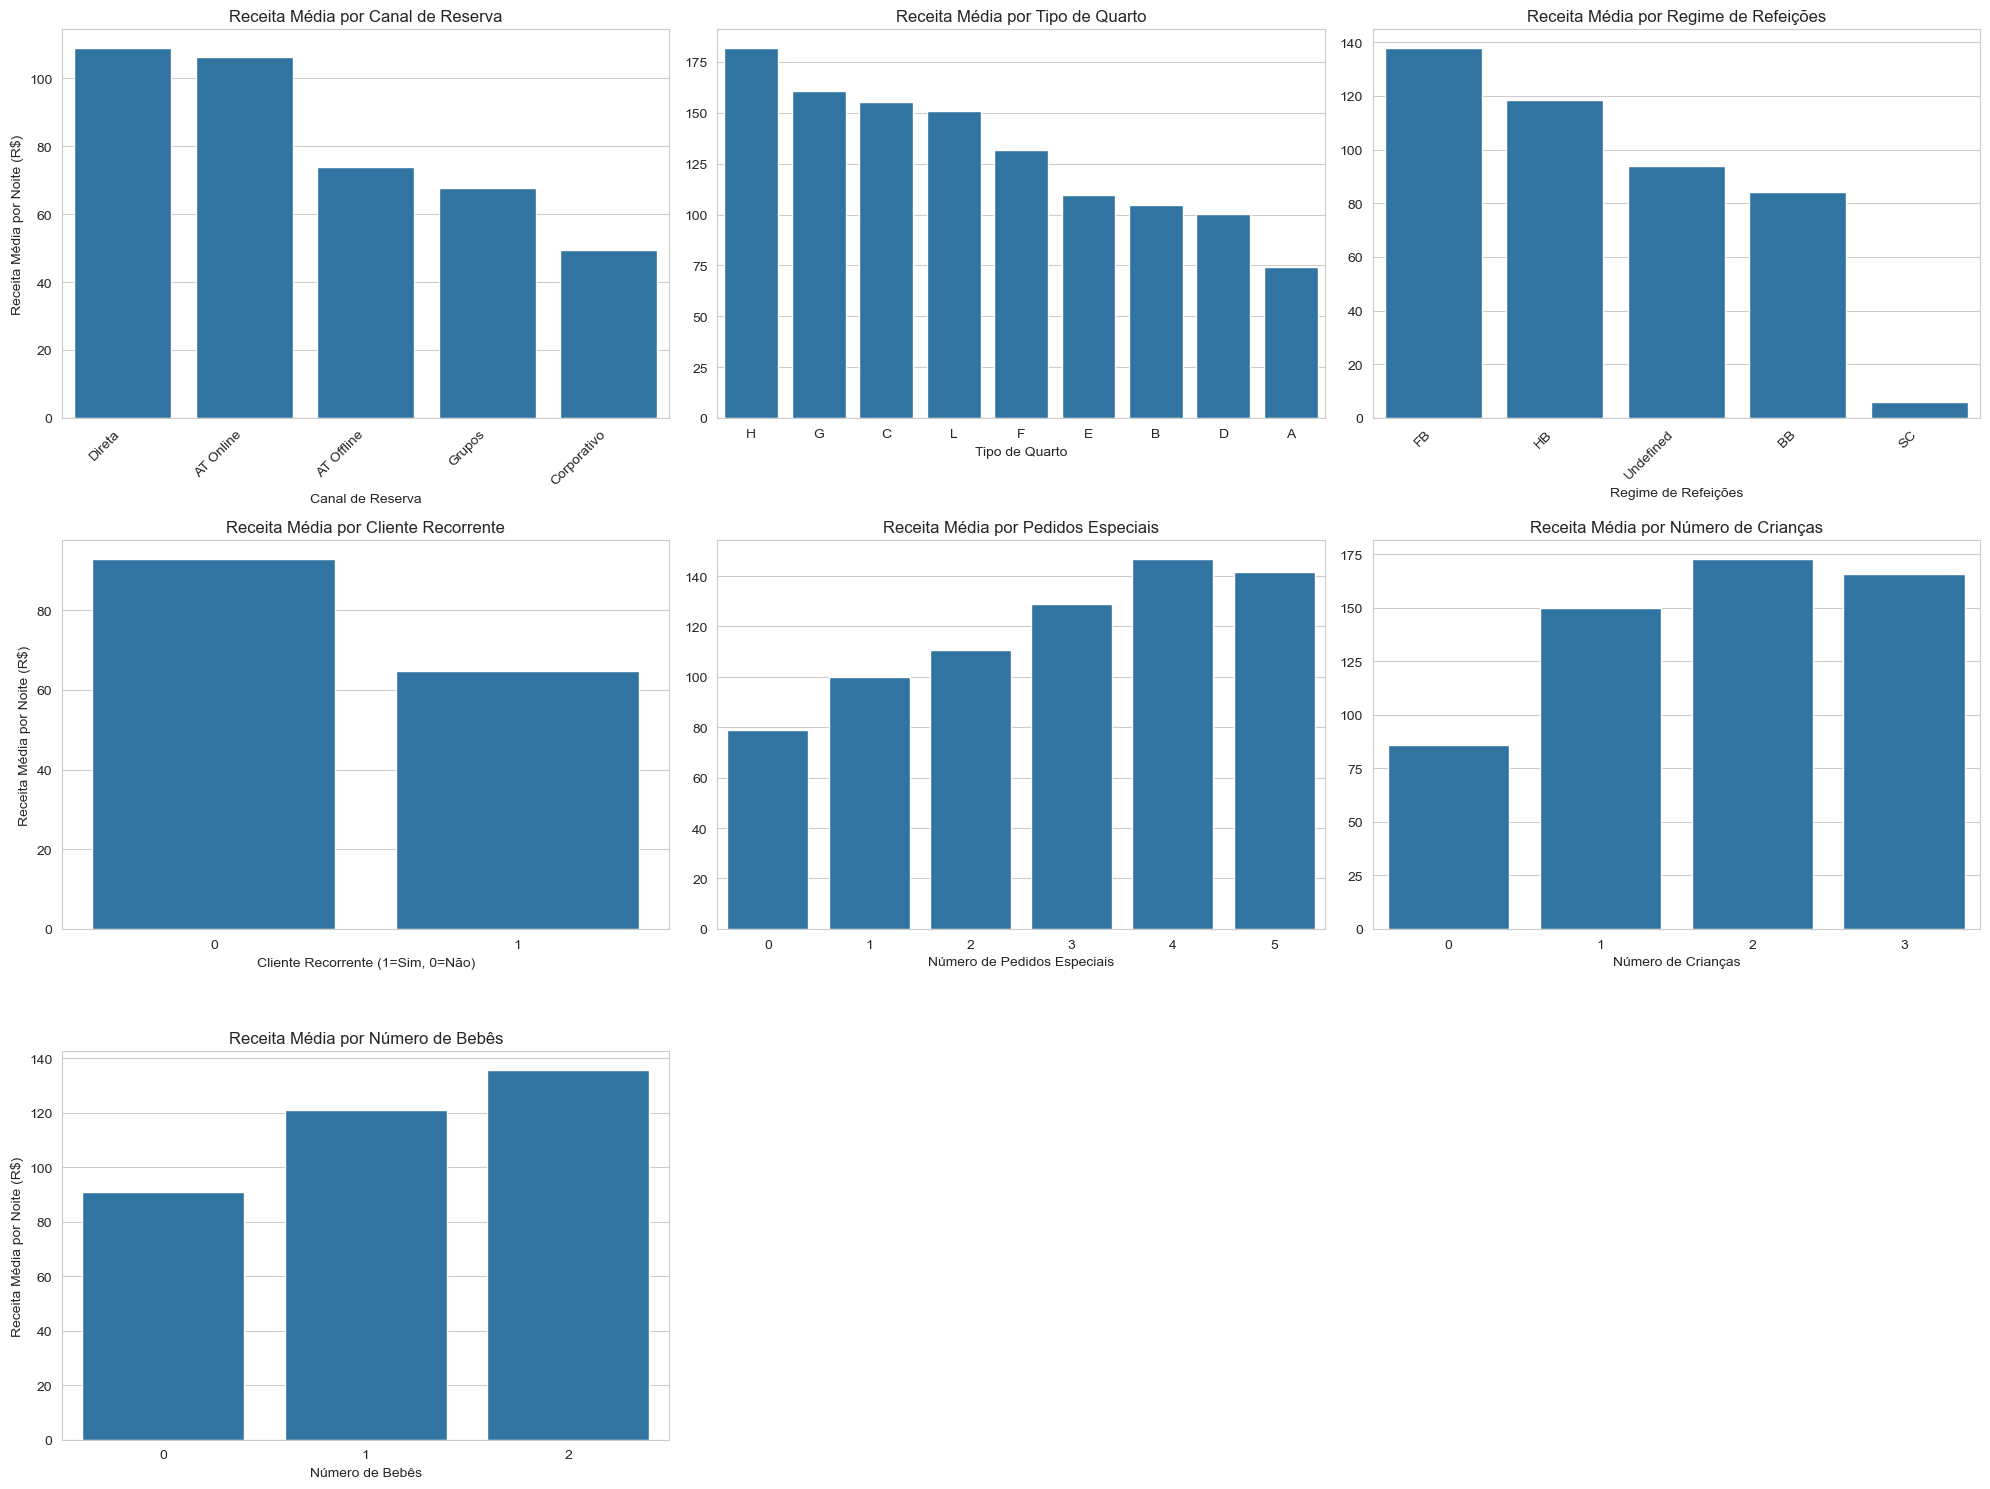

In [ ]:
df = df_hotel.copy(deep=True)

# Filtrando apenas as reservas que não foram canceladas para a análise de receita
df_receita = df[df['reserva_cancelada'] == 0].copy()

# --- Análise de Receita Média por Variável ---

# 1. Receita Média por Canal de Reserva
receita_por_canal = df_receita.groupby('segmento_mercado')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Canal de Reserva:\n",receita_por_canal,"\n")

# 2. Receita Média por Tipo de Quarto
receita_por_quarto = df_receita.groupby('tipo_quarto')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Tipo de Quarto:\n",receita_por_quarto,"\n")

# 3. Receita Média por Regime de Refeições
receita_por_refeicao = df_receita.groupby('alimentacao')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Regime de Refeições:\n",receita_por_refeicao,"\n")

# 4. Receita Média por Cliente Recorrente
receita_por_recorrente = df_receita.groupby('cliente_recorrente')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Cliente Recorrente:\n", receita_por_recorrente, "\n")

# 5. Receita Média por Pedidos Especiais
receita_por_pedidos = df_receita.groupby('pedidos_especiais')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Pedidos Especiais:\n", receita_por_pedidos, "\n")

# 6. Receita Média por Número de Crianças
receita_por_criancas = df_receita.groupby('criancas')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Número de Crianças:\n", receita_por_criancas, "\n")

# 7. Receita Média por Número de Bebês
receita_por_bebes = df_receita.groupby('bebes')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Número de Bebês:\n", receita_por_bebes, "\n")


# --- Visualização dos Resultados ---

# Configurando o estilo dos gráficos
plt.figure(figsize=(20, 15))

# Gráfico 1: Canal de Reserva
plt.subplot(2, 4,  1)
sns.barplot(x='segmento_mercado', y='receita_por_noite', data=receita_por_canal)
plt.title('Receita Média por Canal de Reserva')
plt.xlabel('Canal de Reserva')
plt.ylabel('Receita Média por Noite (R$)')
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Tipo de Quarto
plt.subplot(2, 4,  2)
sns.barplot(x='tipo_quarto', y='receita_por_noite', data=receita_por_quarto)
plt.title('Receita Média por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('')

# Gráfico 3: Regime de Refeições
plt.subplot(2, 4,  3)
sns.barplot(x='alimentacao', y='receita_por_noite', data=receita_por_refeicao)
plt.title('Receita Média por Regime de Refeições')
plt.xlabel('Regime de Refeições')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

# Gráfico 4: Cliente Recorrente
plt.subplot(2, 4,  4)
sns.barplot(x='cliente_recorrente', y='receita_por_noite', data=receita_por_recorrente)
plt.title('Receita Média por Cliente Recorrente')
plt.xlabel('Cliente Recorrente (1=Sim, 0=Não)')
plt.ylabel('Receita Média por Noite (R$)')

# Gráfico 5: Pedidos Especiais
plt.subplot(2, 4,  5)
sns.barplot(x='pedidos_especiais', y='receita_por_noite', data=receita_por_pedidos)
plt.title('Receita Média por Pedidos Especiais')
plt.xlabel('Número de Pedidos Especiais')
plt.ylabel('')

# Gráfico 6: Número de Crianças
plt.subplot(2, 4,  6)
sns.barplot(x='criancas', y='receita_por_noite', data=receita_por_criancas)
plt.title('Receita Média por Número de Crianças')
plt.xlabel('Número de Crianças')
plt.ylabel('')

# Gráfico 7: Número de Bebês
plt.subplot(2, 4,  7)
sns.barplot(x='bebes', y='receita_por_noite', data=receita_por_bebes)
plt.title('Receita Média por Número de Bebês')
plt.xlabel('Número de Bebês')
plt.ylabel('Receita Média por Noite (R$)')

plt.tight_layout()
plt.show()


In [ ]:
df = df_hotel.copy(deep=True)
df_receita = df[df['reserva_cancelada'] == 0].copy()
df_receita['faixa_noites'] = pd.cut(
    df_receita['total_noites'],
    bins=[1, 2, 3, 4, 5, 6, 11, 15, float('inf')], # open interval on the right 
    labels=['1', '2', '3', '4', '5', '6 a 10', '11 a 14', '15+']
)

receita_por_canal = df_receita.groupby('segmento_mercado')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Canal de Reserva:\n",receita_por_canal,"\n")

receita_por_quarto = df_receita.groupby('tipo_quarto')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Tipo de Quarto:\n",receita_por_quarto,"\n")

receita_por_refeicao = df_receita.groupby('alimentacao')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Regime de Refeições:\n",receita_por_refeicao,"\n")

receita_por_recorrente = df_receita.groupby('cliente_recorrente')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Cliente Recorrente:\n", receita_por_recorrente, "\n")

receita_por_pedidos = df_receita.groupby('pedidos_especiais')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Pedidos Especiais:\n", receita_por_pedidos, "\n")

receita_por_criancas = df_receita.groupby('criancas')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Número de Crianças:\n", receita_por_criancas, "\n")

receita_por_bebes = df_receita.groupby('bebes')['receita_por_noite'].mean().sort_values(ascending=False).reset_index()
print("Receita Média por Número de Bebês:\n", receita_por_bebes, "\n")

receita_por_noites = df_receita.groupby('faixa_noites')['receita_por_noite'] \
    .mean().sort_values(ascending=False).reset_index()
print("Receita Média por Faixa de Noites:\n", receita_por_noites, "\n")

receita_por_agencia = df_receita.groupby('agencia_turismo')['receita_por_noite'] \
    .mean().sort_values(ascending=False).reset_index()
print("Receita Média por Agência de Turismo:\n", receita_por_agencia, "\n")



Receita Média por Canal de Reserva:
   segmento_mercado  receita_por_noite
0           Direta         108.935308
1        AT Online         106.274003
2       AT Offline          73.847517
3           Grupos          67.779462
4      Corporativo          49.513064 

Receita Média por Tipo de Quarto:
   tipo_quarto  receita_por_noite
0           H         181.891977
1           G         160.701094
2           C         155.184714
3           L         151.000000
4           F         131.922757
5           E         109.631498
6           B         104.666667
7           D         100.316560
8           A          74.207342 

Receita Média por Regime de Refeições:
   alimentacao  receita_por_noite
0          FB         137.854869
1          HB         118.484050
2   Undefined          93.682628
3          BB          84.084320
4          SC           5.992949 

Receita Média por Cliente Recorrente:
    cliente_recorrente  receita_por_noite
0                   0          92.913533
1    

C:\Users\linde\AppData\Local\Temp\ipykernel_9044\1542398265.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  receita_por_noites = df_receita.groupby('faixa_noites')['receita_por_noite'] \


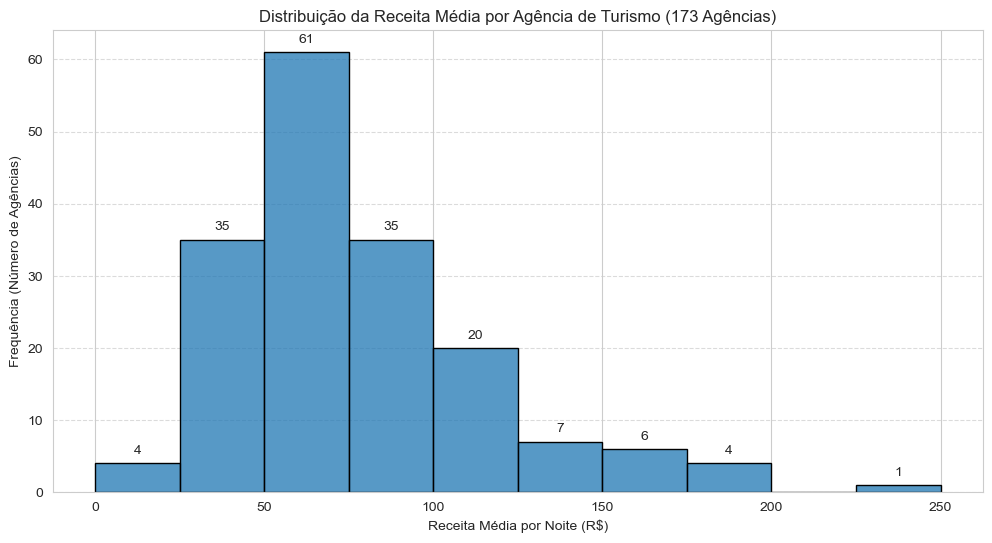

In [ ]:
bin_width = 25
bins = np.arange(0, receita_por_agencia['receita_por_noite'].max()+bin_width, bin_width)

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=receita_por_agencia, x='receita_por_noite', bins=bins, edgecolor='black')


for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title(f'Distribuição da Receita Média por Agência de Turismo ({len(receita_por_agencia["agencia_turismo"].values.tolist())} Agências)')
plt.xlabel('Receita Média por Noite (R$)')
plt.ylabel('Frequência (Número de Agências)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

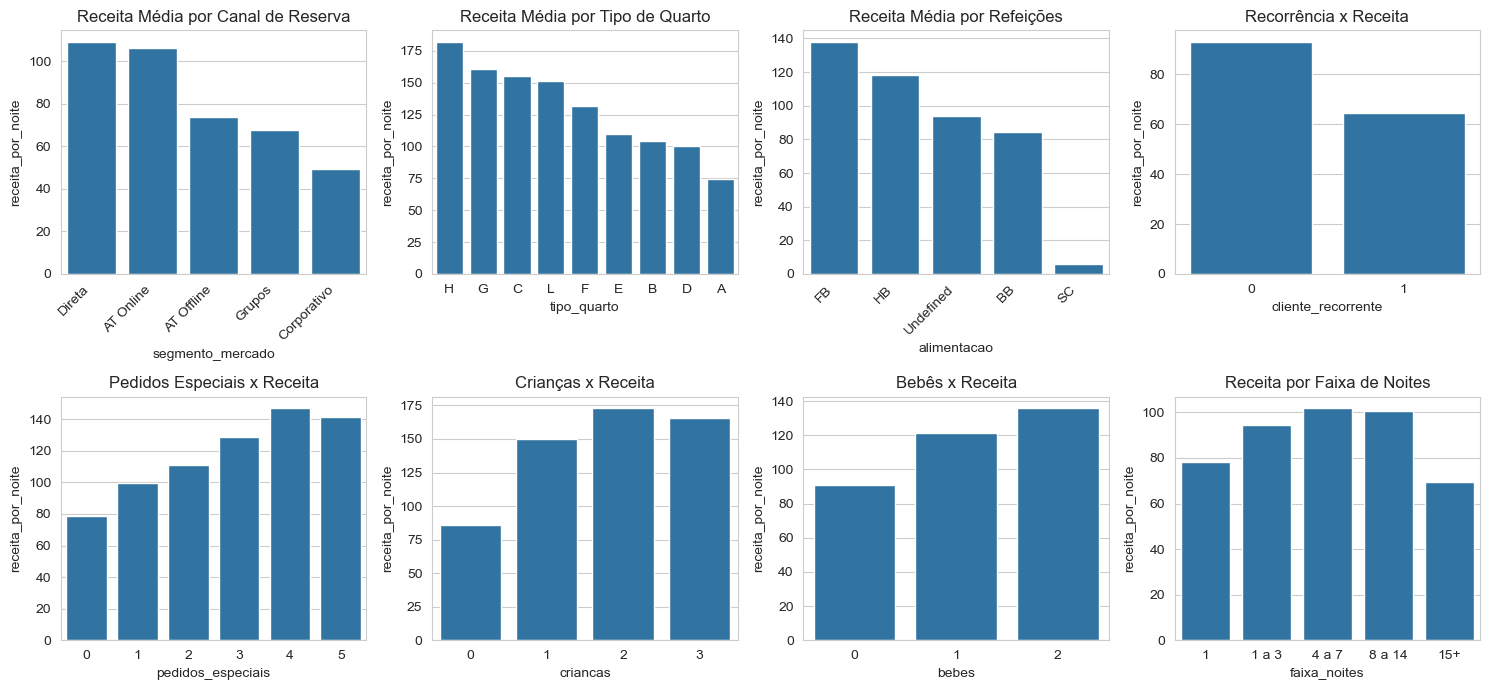

In [ ]:
plt.figure(figsize=(15, 7))

# Gráfico 1: Canal de Reserva
plt.subplot(2, 4,  1)
sns.barplot(x='segmento_mercado', y='receita_por_noite', data=receita_por_canal)
plt.title('Receita Média por Canal de Reserva')
plt.xticks(rotation=45, ha='right')

# Gráfico 2: Tipo de Quarto
plt.subplot(2, 4,  2)
sns.barplot(x='tipo_quarto', y='receita_por_noite', data=receita_por_quarto)
plt.title('Receita Média por Tipo de Quarto')

# Gráfico 3: Regime de Refeições
plt.subplot(2, 4,  3)
sns.barplot(x='alimentacao', y='receita_por_noite', data=receita_por_refeicao)
plt.title('Receita Média por Refeições')
plt.xticks(rotation=45, ha='right')

# Gráfico 4: Cliente Recorrente
plt.subplot(2, 4,  4)
sns.barplot(x='cliente_recorrente', y='receita_por_noite', data=receita_por_recorrente)
plt.title('Recorrência x Receita')

# Gráfico 5: Pedidos Especiais
plt.subplot(2, 4,  5)
sns.barplot(x='pedidos_especiais', y='receita_por_noite', data=receita_por_pedidos)
plt.title('Pedidos Especiais x Receita')

# Gráfico 6: Crianças
plt.subplot(2, 4,  6)
sns.barplot(x='criancas', y='receita_por_noite', data=receita_por_criancas)
plt.title('Crianças x Receita')

# Gráfico 7: Bebês
plt.subplot(2, 4,  7)
sns.barplot(x='bebes', y='receita_por_noite', data=receita_por_bebes)
plt.title('Bebês x Receita')

# Gráfico 8: Faixa de Noites
plt.subplot(2, 4,  8)
sns.barplot(x='faixa_noites', y='receita_por_noite', data=receita_por_noites)

plt.title('Receita por Faixa de Noites')
plt.tight_layout()
plt.show()

In [9]:
distribuicao_segmento_recorrente = pd.crosstab(df_hotel['cliente_recorrente'], df_hotel['segmento_mercado'])
print("Distribuição absoluta por segmento de mercado para clientes recorrentes e não recorrentes:")
print(distribuicao_segmento_recorrente)

print("\n" + "="*50 + "\n")

distribuicao_percentual_segmento = pd.crosstab(df_hotel['cliente_recorrente'], df_hotel['segmento_mercado'], normalize='index') * 100
print("Distribuição percentual por segmento de mercado para clientes recorrentes e não recorrentes:")
print(distribuicao_percentual_segmento)

Distribuição absoluta por segmento de mercado para clientes recorrentes e não recorrentes:
segmento_mercado    AT Offline  AT Online  Corporativo  Direta  Grupos
cliente_recorrente                                                    
0                         7312      17364         1748    5908    5767
1                          160        365          561     605      69


Distribuição percentual por segmento de mercado para clientes recorrentes e não recorrentes:
segmento_mercado    AT Offline  AT Online  Corporativo     Direta     Grupos
cliente_recorrente                                                          
0                    19.192105  45.575999     4.588047  15.506969  15.136880
1                     9.090909  20.738636    31.875000  34.375000   3.920455


# Sazonalidade

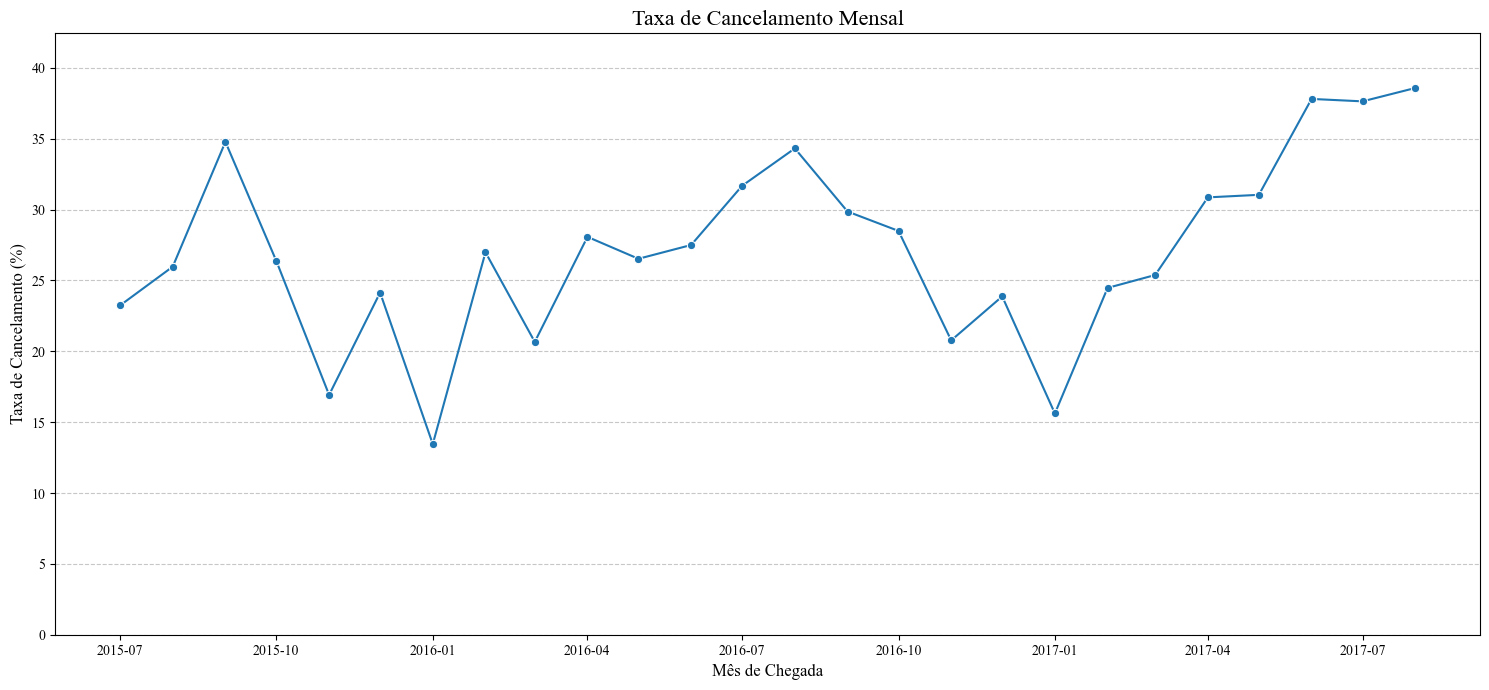

,mes_ano_chegada,total_reservas,total_cancelamentos,taxa_cancelamento
0,2015-07-01,1377,320,23.238925
1,2015-08-01,1409,366,25.975869
2,2015-09-01,1584,551,34.785354
3,2015-10-01,1559,411,26.363053
4,2015-11-01,1093,185,16.925892
5,2015-12-01,1259,304,24.146148
6,2016-01-01,877,118,13.454960
7,2016-02-01,1508,407,26.989390
8,2016-03-01,1771,366,20.666290
9,2016-04-01,1859,522,28.079613


In [8]:
df_hotel['mes_ano_chegada'] = df_hotel['data_chegada'].dt.to_period('M').dt.to_timestamp()

taxa_cancelamento_mensal = df_hotel.groupby('mes_ano_chegada').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_mensal['taxa_cancelamento'] = (taxa_cancelamento_mensal['total_cancelamentos'] / taxa_cancelamento_mensal['total_reservas']) * 100

plt.figure(figsize=(15, 7))
sns.lineplot(data=taxa_cancelamento_mensal, x=taxa_cancelamento_mensal.index, y='taxa_cancelamento', marker='o')
plt.title('Taxa de Cancelamento Mensal', fontsize=16)
plt.xlabel('Mês de Chegada', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, taxa_cancelamento_mensal['taxa_cancelamento'].max() * 1.1)
plt.tight_layout()
plt.show()

taxa_cancelamento_mensal.reset_index(inplace=True)
taxa_cancelamento_mensal